# Random Forest Classification

## Importing the libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [58]:
def load_csv_dataset(file_path):
    """
    Parameters:
    file_path (str): The path to the CSV file.
    Purpose:
    Load dataset, and assign features matrix and target vector.
    Returns:
    Tuple[np.ndarray, np.ndarray]: Features matrix and target vector.
    """
    try:
        dataset = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        X = dataset.iloc[:, :-1].values
        y = dataset.iloc[:, -1].values
        return X, y
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

X, y = load_csv_dataset('Social_Network_Ads.csv')

Dataset loaded successfully.


### Print shapes of independent feature/s matrix and dependent target vector

In [59]:
def print_shapes(X, y):
    """
    Parameters:
    X (np.ndarray): Features matrix.
    y (np.ndarray): Target vector.
    Purpose:
    Print the shapes of the features matrix and target vector.
    Returns:
    None
    """
    print(f"Features matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")

print_shapes(X, y)


Features matrix shape: (400, 2)
Target vector shape: (400,)


## Splitting the dataset into the Training set and Test set

In [60]:
from sklearn.model_selection import train_test_split
def split_dataset(X, y, test_size=1/4, random_state=0):
    """
    Parameters:
    X (np.ndarray): Features matrix.
    y (np.ndarray): Target vector.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int): Random seed for reproducibility.
    Purpose:
    Split the dataset into training and testing sets.
    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: Training and testing sets for features and target.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataset(X, y)

### Print split shapes of independent feature/s matrix and dependent target vector

In [61]:
def print_split_shapes(X_train, X_test, y_train, y_test):
    """
    Parameters:
    X_train (np.ndarray): Training features matrix.
    X_test (np.ndarray): Testing features matrix.
    y_train (np.ndarray): Training target vector.
    y_test (np.ndarray): Testing target vector.
    Purpose:
    Print the shapes of the training and testing sets.
    Returns:
    None
    """
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")
    print(f"Training target shape: {y_train.shape}")
    print(f"Testing target shape: {y_test.shape}")

print_split_shapes(X_train, X_test, y_train, y_test)


Training features shape: (300, 2)
Testing features shape: (100, 2)
Training target shape: (300,)
Testing target shape: (100,)


### Print split samples of independent features matrix and dependent target vector

In [62]:
def print_split_samples(X_train, X_test, y_train, y_test, sample_num=10):
  """
  Parameters:
    X_train (np.ndarray): Training features matrix.
    X_test (np.ndarray): Testing features matrix.
    y_train (np.ndarray): Training target vector.
    y_test (np.ndarray): Testing target vector.
    sample_num (int): Number of samples to display.
  Purpose:
    Print a sample of the training and testing sets.
  Returns:
    None
  """
  print("Training features sample:")
  print(X_train[:sample_num])
  print("Testing features sample:")
  print(X_test[:sample_num])
  print("Training target sample:")
  print(y_train[:sample_num])
  print("Testing target sample:")
  print(y_test[:sample_num])

print_split_samples(X_train, X_test, y_train, y_test)


Training features sample:
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]
Testing features sample:
[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]]
Training target sample:
[0 1 0 1 1 1 0 0 0 0]
Testing target sample:
[0 0 0 0 0 0 0 1 0 0]


## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
def standardize_features(X_train, X_test):
    """
    Parameters:
    X_train (np.ndarray): Training features matrix.
    X_test (np.ndarray): Testing features matrix.
    Purpose:
    Standardize the features by removing the mean and scaling to unit variance.
    Returns:
    Tuple[np.ndarray, np.ndarray, StandardScaler ]: A tuple containing the standardized
    training features, standardized testing features, and the fitted scaler object.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

X_train, X_test, scaler = standardize_features(X_train, X_test)


### Print scaled samples of features matrix sets

In [64]:
def print_scaled_samples(X_train, X_test, sample_num=10):
  """
  Parameters:
  X_train (np.ndarray): Scaled training features matrix.
  X_test (np.ndarray): Scaled testing features matrix.
  Purpose:
  Print a sample of the scaled training and test sets.
  Return:
  None
  """
  print("Training features sample:")
  print(X_train[:sample_num])
  print("Testing features sample:")
  print(X_test[:sample_num])

print_scaled_samples(X_train, X_test)


Training features sample:
[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]
Testing features sample:
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]


## Training the Random Forest Classification model on the Training set

In [65]:
from sklearn.ensemble import RandomForestClassifier
def train_random_forest(X_train, y_train, n_estimators=100, criterion='entropy', random_state=0):
    """
    Parameters:
    X_train (np.ndarray): Training features matrix.
    y_train (np.ndarray): Training target vector.
    n_estimators (int): The number of trees in the forest.
    criterion (str): The function to measure the quality of a split.
    random_state (int): Random seed for reproducibility.
    Purpose:
    Train a Random Forest Classifier on the training data.
    Returns:
    RandomForestClassifier: The trained Random Forest Classifier.
    """
    classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=random_state)
    classifier.fit(X_train, y_train)
    return classifier

classifier = train_random_forest(X_train, y_train)

## Predicting a new result

In [66]:
classifier.predict(scaler.transform([[30, 87000]]))

array([0])

## Predicting the Test set results

In [67]:
y_pred = classifier.predict(X_test)

### Printing the predictions to the actual data

In [68]:
def print_predictions(y_pred, y_test, sample_num=35):
    """
    Parameters:
    y_pred (np.ndarray): Predicted target vector.
    y_test (np.ndarray): Actual target vector.
    Purpose:
    Print the predicted and actual target values side by side for comparison.
    Returns:
    None
    """
    print('Actual vs Predicted:')
    print(y_test[:sample_num])
    print(y_pred[:sample_num])

print_predictions(y_pred, y_test)

Actual vs Predicted:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0]


## Making the Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(y_test, y_pred):
    """
    Parameters:
    y_test (np.ndarray): Actual target vector.
    y_pred (np.ndarray): Predicted target vector.
    Purpose:
    Evaluate the model using a confusion matrix and accuracy score.
    Returns:
    Tuple[np.ndarray, float]: Confusion matrix and accuracy score.
    """
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return cm, accuracy

cm, accuracy = evaluate_model(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
#!/usr/bin/env python3

Confusion Matrix:
[[63  5]
 [ 4 28]]
Accuracy: 0.91


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


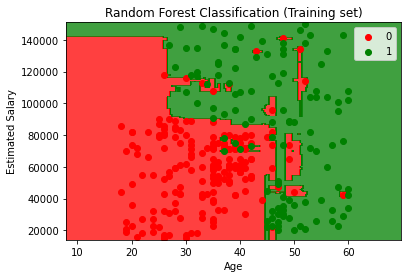

In [70]:
from matplotlib.colors import ListedColormap
plt.figure.figsize = (10,6)
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

In [71]:
from matplotlib.colors import ListedColormap
plt.figure.figsize = (10,6)
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'sc' is not defined